In [1]:

"""
Created on Sun Oct 14 14:28:29 2018

@author: Morteza HASHEMI
"""
#-------Import needed libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



#-------Load dataset into Pandas Dataframe 

views = pd.read_csv("C:/Users/Spa-Francorchamps/Downloads/eco_v0.2/all_product_2018.csv")
carts = pd.read_csv("C:/Users/Spa-Francorchamps/Downloads/eco_v0.2/all_order_2018.csv")


In [2]:
#-------Convert timestamp to human readable time units

carts.index = pd.to_datetime(carts['timestamp'], unit='ms')
views.index = pd.to_datetime(views['timestamp'], unit='ms')

carts = carts.drop(['timestamp'], axis=1)
views = views.drop(['timestamp'], axis=1)


#-------Small optimization & cleaning

carts.dropna(subset=["product_ids"], inplace=True)
views['product_id'] = views['product_id'].astype('int')

In [4]:
#------Formatting "product_ids" column

lst = []

for row in carts.iterrows():
    vals = row[1].values
    product_ids = vals[1]
    for id_prod in product_ids.split("|"):
        lst.append([vals[0], id_prod, vals[2]])
#         current = pd.DataFrame([[vals[0], id_prod, vals[2]]], columns=cols)
#         current.index = [row[0]] 
#         print(current)

cols = carts.columns.tolist()
cart_flatten = pd.DataFrame(lst, columns=cols)
cart_flatten.head()

,customer_id,product_ids,cart_price
0,401a01d8c3a64e11,188,28.89
1,401a01d8c3a64e11,1439,28.89
2,3e87edf753a9f1a1,2790,199.95
3,bd750602eac31a94,157,11.20
4,3e083e3a130b21b2,647,17.85


In [4]:
#------Convert the product_ids to int
cart_flatten['product_ids'] = cart_flatten['product_ids'].astype('int')
cart_flatten.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9666 entries, 0 to 9665
Data columns (total 3 columns):
customer_id    9666 non-null object
product_ids    9666 non-null int32
cart_price     9666 non-null float64
dtypes: float64(1), int32(1), object(1)
memory usage: 188.9+ KB


In [5]:
carts.head()

,customer_id,product_ids,cart_price
timestamp,,,
2017-12-31 23:41:11.712,401a01d8c3a64e11,188|1439,28.89
2018-01-01 11:56:16.242,3e87edf753a9f1a1,2790,199.95
2018-01-01 13:26:38.703,bd750602eac31a94,157,11.20
2018-01-01 13:40:24.978,3e083e3a130b21b2,647,17.85
2018-01-01 15:57:46.958,30fdc97b0eb7761b,2,28.70


In [6]:
views.head()

,customer_id,product_id,full_price,actual_price
timestamp,,,,
2017-12-31 23:00:21.389,a1768f6141ba9932,1962,238.842975,167.190083
2017-12-31 23:02:09.316,9afedb29c50f8ab9,804,57.024793,57.024793
2017-12-31 23:02:43.368,f5d79ddd326abb30,1681,57.851240,57.851240
2017-12-31 23:03:10.137,64937cc7dc6d57dd,2005,164.462810,115.123967
2017-12-31 23:03:17.932,9c4edff0e7e785e7,2546,681.820579,681.820579


In [7]:
#-----------Merge the two datasets (cart_flatten and views)

mergedProd = cart_flatten.merge(views, how='left', left_on='product_ids', right_on='product_id', 
                                suffixes=['_cart', '_view'])


#-----------Locating rows where the "product_id" is null

mergedProd[mergedProd['product_id'].isnull()]


#----------Drop Na rows

mergedProd.dropna(subset=['product_id'], inplace=True)

mergedProd.head()

,customer_id_cart,product_ids,cart_price,customer_id_view,product_id,full_price,actual_price
0,401a01d8c3a64e11,188,28.89,7b4464d06d7ffbfb,188.0,4.950413,4.950413
1,401a01d8c3a64e11,188,28.89,75dd9fe3daae2927,188.0,4.950413,4.950413
2,401a01d8c3a64e11,188,28.89,ba557ca06e436eaf,188.0,4.950413,4.950413
3,401a01d8c3a64e11,188,28.89,485fbe5297fbeefa,188.0,4.950413,4.950413
4,401a01d8c3a64e11,188,28.89,c0e3a1443cb5d177,188.0,4.950413,4.950413


In [8]:
mergedProd['product_id'] = mergedProd['product_id'].astype('int')

In [9]:
grpByProductID = mergedProd.groupby(['product_ids'])

In [13]:
#------Number of unique people ordered each individual product

productPerCart = grpByProductID['customer_id_cart'].nunique()
productPerCart.head()

product_ids
2     108
3       5
14      7
15      2
18      1
Name: customer_id_cart, dtype: int64

In [14]:
#------Number of unique people viewed each individual product

productPerView = grpByProductID['customer_id_view'].nunique()
productPerView.head()

product_ids
2     2219
3     2481
14     673
15     129
18      58
Name: customer_id_view, dtype: int64

In [15]:
#--------Create a data frame and calculate the number of "Cart Per View" for each product
#--------cart_per_view : (number of  / number of views)  for each product
#--------view_per_cart : (number of views / number of purchases)  for each product

cartPerView = pd.DataFrame({'per_cart': productPerCart, 'per_view': productPerView})
cartPerView['cart_per_view'] = cartPerView['per_cart'] / cartPerView['per_view']
cartPerView['view_per_cart'] = cartPerView['per_view'] / cartPerView['per_cart']
cartPerView.head()

,per_cart,per_view,cart_per_view,view_per_cart
product_ids,,,,
2,108,2219,0.048671,20.546296
3,5,2481,0.002015,496.200000
14,7,673,0.010401,96.142857
15,2,129,0.015504,64.500000
18,1,58,0.017241,58.000000


Text(0.5,0,'Product ID')

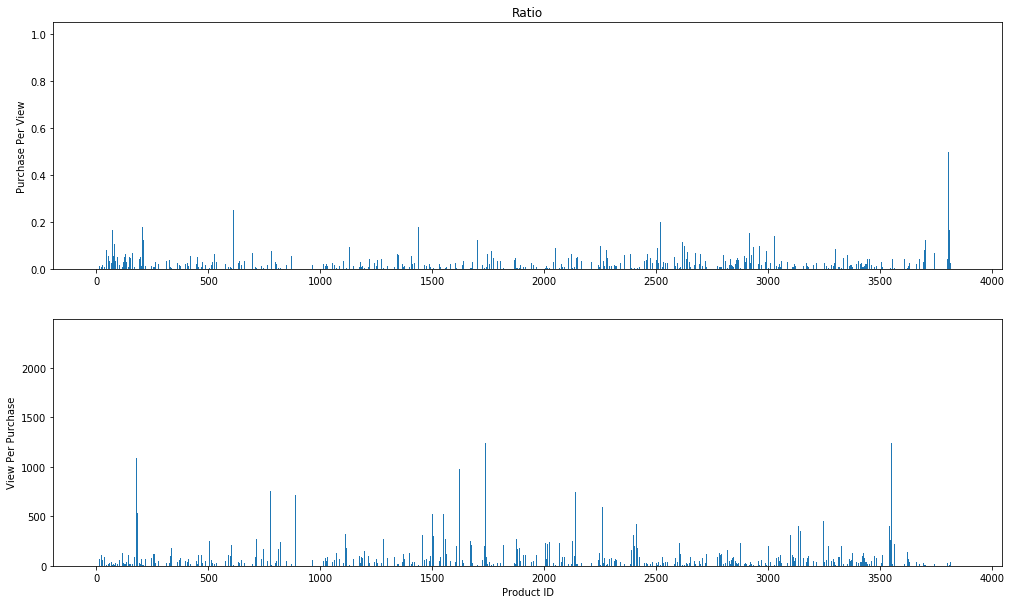

In [16]:
plt.figure(figsize=(17,10))
plt.subplot(2,1,1)
plt.title('Ratio')
plt.bar(cartPerView.index, cartPerView['cart_per_view'])
plt.ylabel('Purchase Per View')
plt.subplot(2,1,2)
plt.bar(cartPerView.index, cartPerView['view_per_cart'])
plt.ylabel('View Per Purchase')
plt.xlabel('Product ID')

In [20]:
#---------Top 10 best sellers

popularProds = cartPerView['cart_per_view'].nlargest(10)
popularProds

product_ids
1731    1.000000
3851    1.000000
1809    0.500000
2389    0.500000
2637    0.500000
3806    0.500000
1353    0.333333
1513    0.333333
2929    0.333333
3032    0.333333
Name: cart_per_view, dtype: float64

In [21]:
#---------Bottom 10 least selling products

unpopularProds = cartPerView['view_per_cart'].nlargest(10)
unpopularProds

product_ids
2184    2376.0
1282    2294.0
1501    1677.0
1893    1503.0
1738    1241.0
3551    1240.0
185     1207.0
1675    1153.0
2183    1096.0
180     1084.0
Name: view_per_cart, dtype: float64

In [ ]:
# Dec 2nd

In [57]:
productFreq = views['product_id'].value_counts()

(array([1.263e+03, 7.470e+02, 3.790e+02, 2.240e+02, 1.190e+02, 1.040e+02,
        7.100e+01, 6.000e+01, 3.500e+01, 2.800e+01, 2.500e+01, 1.400e+01,
        1.600e+01, 8.000e+00, 1.200e+01, 9.000e+00, 1.300e+01, 7.000e+00,
        3.000e+00, 8.000e+00, 3.000e+00, 4.000e+00, 2.000e+00, 8.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        2.000e+00, 0.000e+00, 3.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00]),
 array([1.00000e+00, 9.75400e+01, 1.94080e+02, 2.90620e+02, 3.87160e+02,
        4.83700e+02, 5.80240e+02, 6.76780e+02, 7.73320e+02, 8.69860e+02,
        9.66400e+02, 1.06294e+03, 1.15948e+03, 1.25602e+03, 1.35256e+03,
        1.44910e+03, 1.54564e+03, 1.64218e+03, 1.73872e+03, 1.83526e+03,
        1.93180e+03, 2.02834e+03, 2.12488e+03, 2.22142e+03, 2.31796e+03,
        2.4

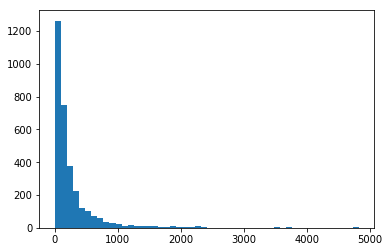

In [59]:
plt.hist(productFreq, bins=50)

In [64]:
median = np.median(productFreq)
print("Median: ", median)
productFreq.describe()

Median:  132.0


count    3181.000000
mean      260.152468
std       403.532928
min         1.000000
25%        57.000000
50%       132.000000
75%       289.000000
max      4828.000000
Name: product_id, dtype: float64

(array([   5.,   46.,  374., 1432., 3001., 2958., 1643.,  472.,   62.,
           7.]), array([ 36.51137067,  49.01435503,  61.51733939,  74.02032375,
         86.52330811,  99.02629246, 111.52927682, 124.03226118,
        136.53524554, 149.0382299 , 161.54121426]), <a list of 10 Patch objects>)

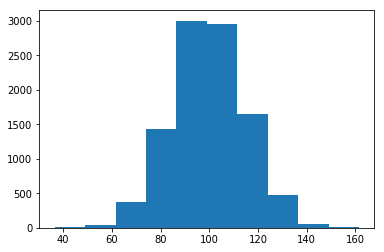

In [34]:
plt.hist(x)

In [ ]:
#---------------------------OLDER CODES------------------

In [12]:
personofInterest = carts['customer_id'].value_counts()
personofInterest = personofInterest.index[0]
personofInterest

'05ae14eada9a45ca'

In [99]:
personofInterestPurchases = carts.loc[carts['customer_id'] == personofInterest]
personofInterestPurchases.tail()

,customer_id,product_ids,cart_price
timestamp,,,
2018-09-28 10:42:06.473,05ae14eada9a45ca,353,15.00
2018-10-02 08:22:03.518,05ae14eada9a45ca,47|56,23.70
2018-10-02 11:04:16.775,05ae14eada9a45ca,156|159,14.60
2018-10-02 17:04:00.242,05ae14eada9a45ca,681,12.95
2018-10-02 17:19:33.698,05ae14eada9a45ca,2785|1132|1129,316.85


In [120]:
#-----Extracting our person of interest purchases up till October 1st to have the balance in our dataframe

df = personofInterestPurchases[:pd.to_datetime('Oct 2018')]
df.tail()

,customer_id,product_ids,cart_price
timestamp,,,
2018-09-27 16:22:12.846,05ae14eada9a45ca,834|3849|2820|3793,608.98
2018-09-27 16:48:29.088,05ae14eada9a45ca,2837|1129,210.90
2018-09-27 16:59:23.318,05ae14eada9a45ca,2044,42.00
2018-09-27 17:19:41.511,05ae14eada9a45ca,453,28.00
2018-09-28 10:42:06.473,05ae14eada9a45ca,353,15.00


In [121]:
#-----Calculating our person of interest monthly purchases

personofInterestPurchasesPerMonth = personofInterestPurchases[:pd.to_datetime('Oct 2018')].resample('M').sum()
personofInterestPurchasesPerMonth

,cart_price
timestamp,
2018-04-30,106.80
2018-05-31,2333.11
2018-06-30,2394.98
2018-07-31,1943.39
2018-08-31,4138.55
2018-09-30,4050.03


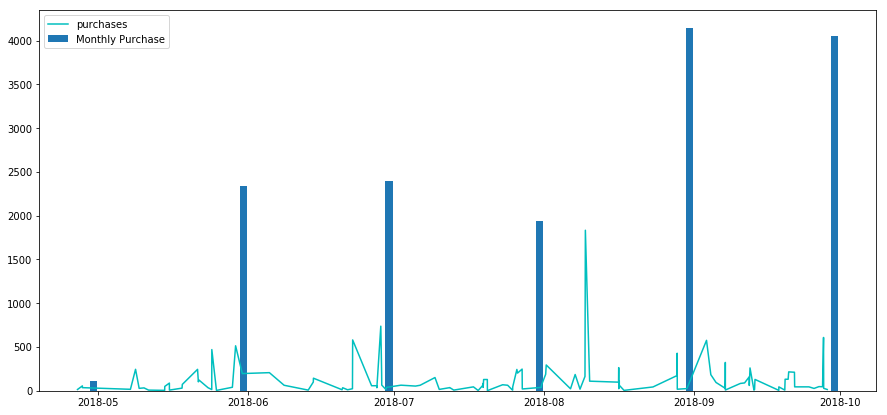

In [132]:
#------Plot a bar chart for monthly purchases and a normal plot of purchases throughout the period

plt.figure(figsize=(15,7))
plt.bar(personofInterestPurchasesPerMonth.index, personofInterestPurchasesPerMonth['cart_price'],
        width=1.5, label='Monthly Purchases')
plt.plot(df.index, df['cart_price'], 'c', label='Purchases')
plt.legend(loc='upper left')

In [20]:
#------Find the product with the most number of views

productsPerView = views['product_id'].value_counts()
productofInterest = productsPerView.index[0]
productofInterest

180

In [37]:
#------A time series dataframe of the infamous product

df = views[views['product_id'] == productofInterest]
df.tail()

,customer_id,product_id,full_price,actual_price
timestamp,,,,
2018-10-03 05:43:46.731,185d619075f1d426,180,304.958678,304.958678
2018-10-03 06:16:29.292,185d619075f1d426,180,304.958678,304.958678
2018-10-03 10:26:35.697,b2af6476eb75d119,180,304.958678,304.958678
2018-10-03 10:34:11.094,185d619075f1d426,180,304.958678,304.958678
2018-10-03 10:36:31.285,185d619075f1d426,180,304.958678,304.958678


In [47]:
#------Resample the dataframe to get the daily number of visits

dailyView = df[ pd.to_datetime('Jan 2018') : pd.to_datetime('Oct 2018') ]['customer_id'].resample('D').count()
dailyView.head()

timestamp
2018-01-01     5
2018-01-02    26
2018-01-03    21
2018-01-04    15
2018-01-05    11
Freq: D, Name: customer_id, dtype: int64

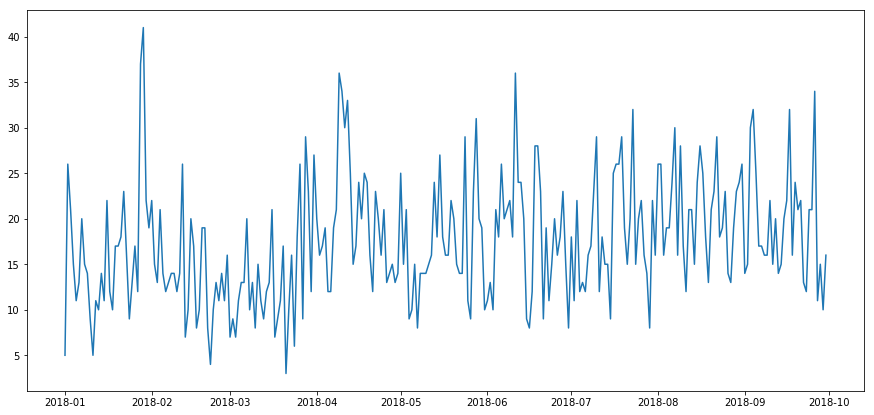

In [49]:
#-----Plot the number of views againts days

plt.figure(figsize=(15,7))
plt.plot(dailyView.index, dailyView, label='daily View')

In [51]:
mean = dailyView.mean()
mean

17.494505494505493

In [53]:
median = dailyView.median()
median

16.0

(array([ 1.,  1.,  0.,  2.,  1.,  0.,  4.,  7.,  0., 11.,  0., 11., 13.,
         0., 15., 16.,  0., 18., 21.,  0., 19.,  0., 11., 11.,  0., 12.,
        15.,  0., 14.,  0., 11., 10.,  0.,  9.,  6.,  0.,  9.,  2.,  0.,
         4.,  0.,  5.,  3.,  0.,  1.,  3.,  0.,  1.,  2.,  0.,  0.,  0.,
         2.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 3.        ,  3.63333333,  4.26666667,  4.9       ,  5.53333333,
         6.16666667,  6.8       ,  7.43333333,  8.06666667,  8.7       ,
         9.33333333,  9.96666667, 10.6       , 11.23333333, 11.86666667,
        12.5       , 13.13333333, 13.76666667, 14.4       , 15.03333333,
        15.66666667, 16.3       , 16.93333333, 17.56666667, 18.2       ,
        18.83333333, 19.46666667, 20.1       , 20.73333333, 21.36666667,
        22.        , 22.63333333, 23.26666667, 23.9       , 24.53333333,
        25.16666667, 25.8       , 26.43333333, 27.06666667, 27.7       ,
        28.33333333, 28.96666667, 29.6       , 30.23333333, 30.86666667,
 

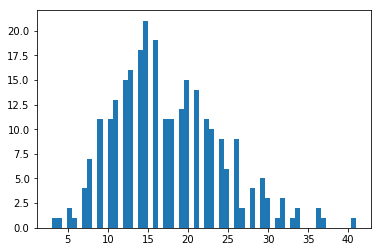

In [61]:
plt.hist(dailyView, bins=60)